# Weather Pattern by State in Mexico

Date of creation: July 6, 2020

Author: [Carlos Nieto](https://github.com/CarlosDNieto)

**Objective:** <br>
Keep a tracking of the monthly temperature by state in Mexico and compare the temperatures with the record highs and lows.

**Database:** <br>
The data comes from a subset of excel files from the [Mexico City government](https://datos.gob.mx) and contains the behavior of the average minimun and maximun temperature at the state and monthly level from 1985 to the date maesured.

This data is separated in two folders you can download from the folowing links:
* Min temperature per month and per state in Mexico: https://datos.gob.mx/busca/dataset/temperatura-minima-excel

* Max temperature per month and per state in Mexico: https://datos.gob.mx/busca/dataset/temperatura-maxima-excel

## Import libraries

In [2]:
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Get all the Excel file names in the correct directory

Once you have downloaded the data from the source, you can see that it is separated in two folders (highs and lows), this two folders contain one Excel file per year, from 1985 to 2019. **We use the library ``glob`` to fetch all the filenames that we need so we can read them.**

In [3]:
filesmax = './Temperatura_Maxima_Excel'
filesmin = './Temperatura_Minima_Excel'

files = glob.glob(filesmax + "/*.xlsx")
files = files + [f for f in glob.glob(filesmin + "/*.xlsx")]

## Data preparation
In this part we read all of the Excel files with ``pandas``, one by one we clean the data as we need it and we consolidate all it into one master ``DataFrame`` called ``df``.

In [5]:
df = pd.DataFrame(columns = ["State", "Year", "Month", "Kind", "Temp"])
for file in files:
    temp = pd.read_excel(file)
    year = temp.columns[0]
    if temp.columns[1].split()[1]=="MÁXIMA":
        kind = "max"
    elif temp.columns[1].split()[1]=="MÍNIMA":
        kind = "min"
    temp.columns = temp.iloc[0].values
    temp = temp.iloc[1:].reset_index(drop=True)
    temp = temp.drop("ANUAL", axis=1)
    temp = temp.iloc[:-1]
    months_dict = dict(zip(temp.columns[1:],list(range(1,13))))
    months = []
    states = []
    values = []
    years = [year]*(12*32)                       # 12*32 = n_months * n_states = n_value_elements
    kinds = [kind]*(12*32)
    for row_idx in range(len(temp)):
        for col_idx in range(1,13):
            months.append(col_idx)
            states.append(temp["ENTIDAD"].iloc[row_idx])
            values.append(temp.iloc[row_idx,col_idx])
    temp2 = pd.DataFrame({"State":states, "Year":years, "Month":months, "Kind":kinds, "Temp":values})
    df = pd.concat([df,temp2],ignore_index=True)

## Generate visualization for every state in Mexico

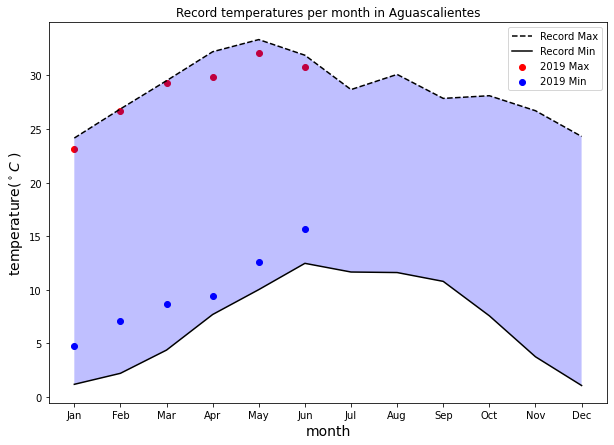

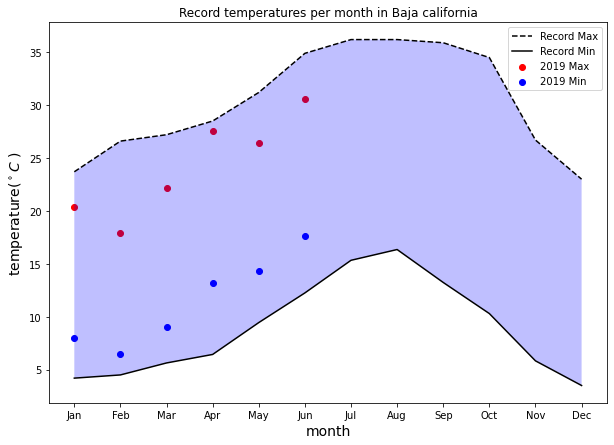

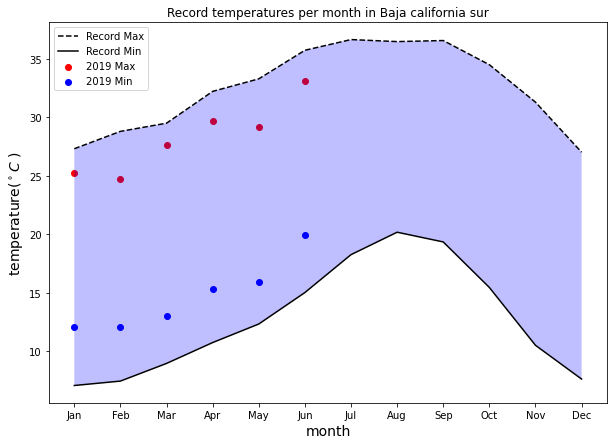

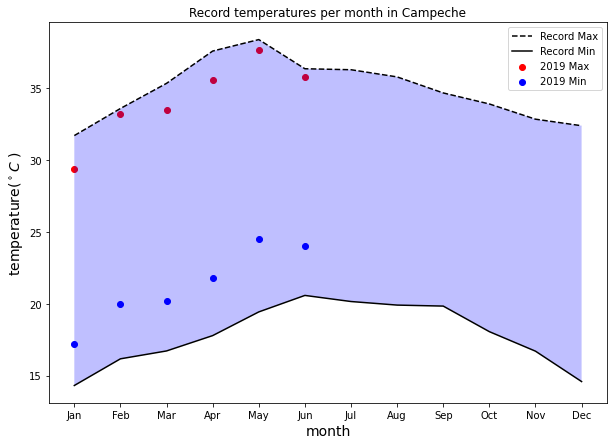

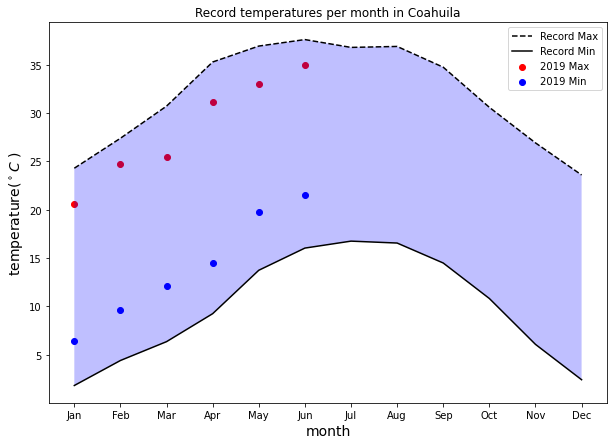

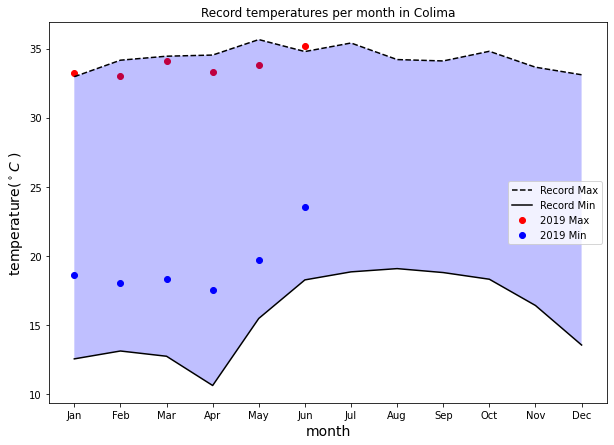

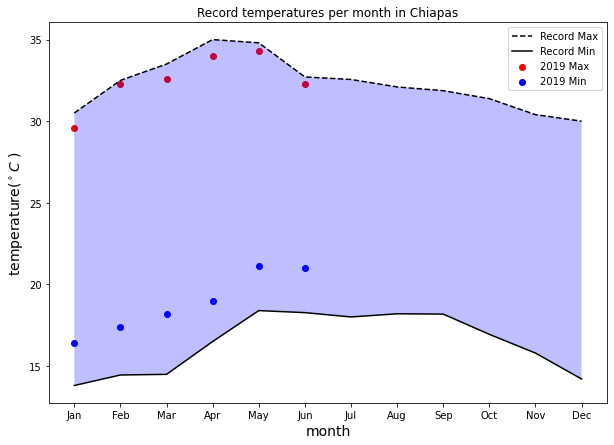

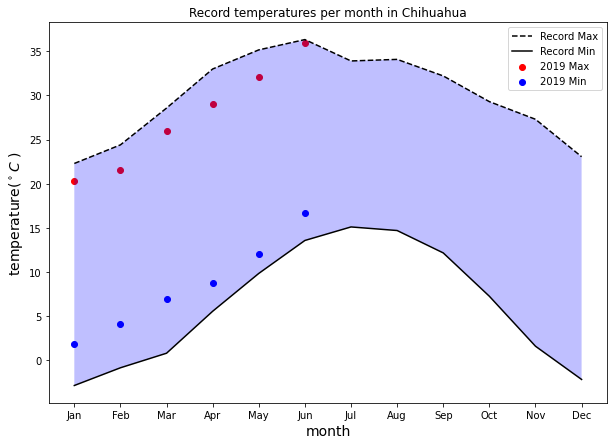

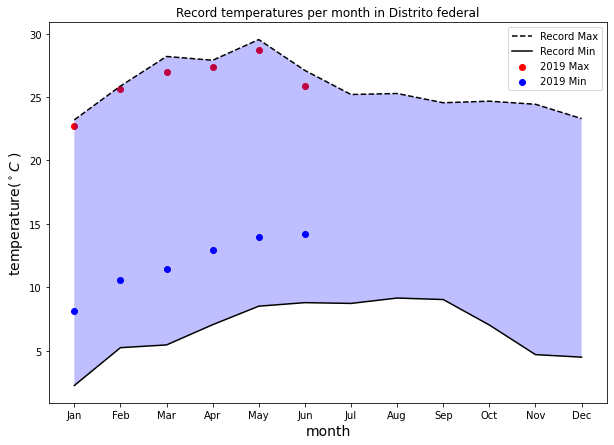

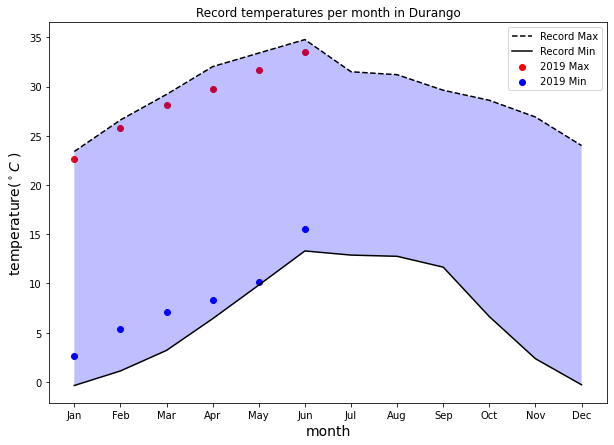

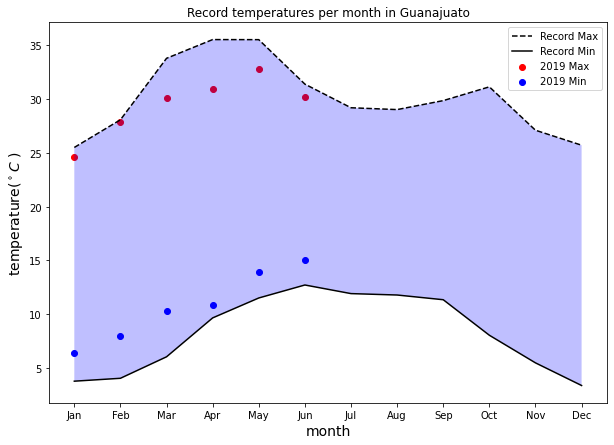

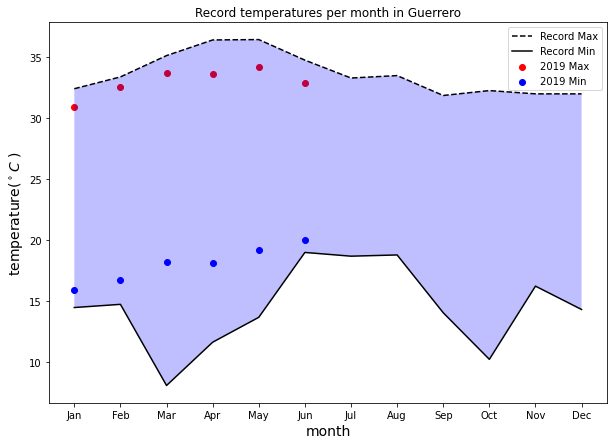

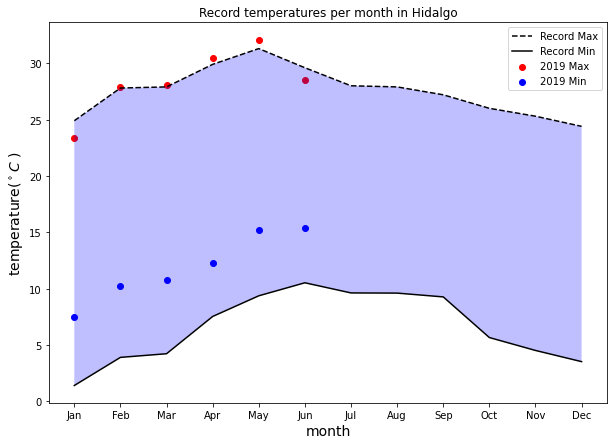

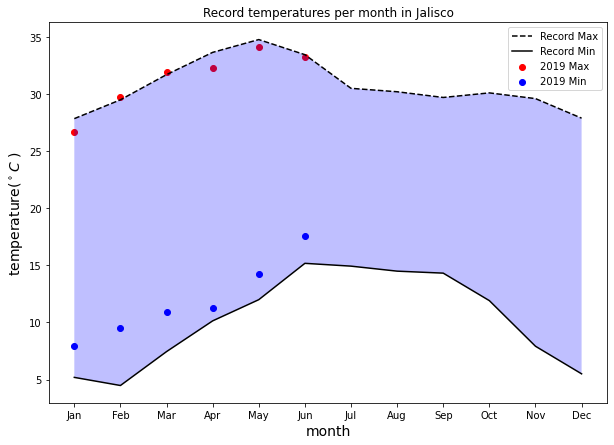

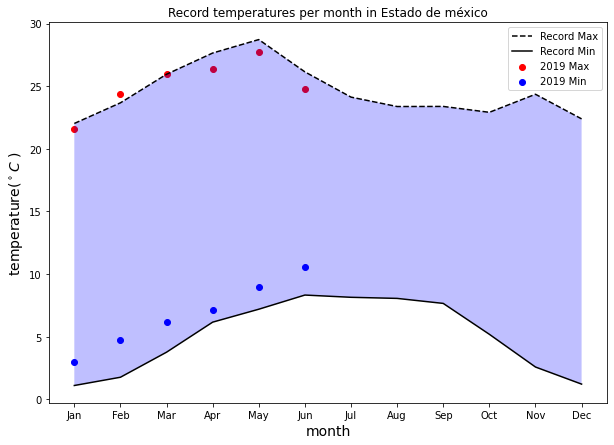

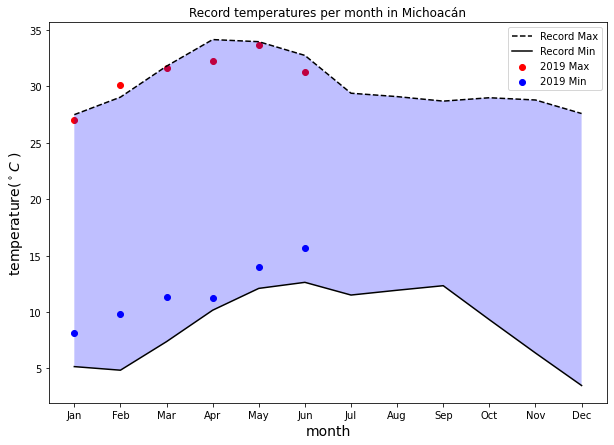

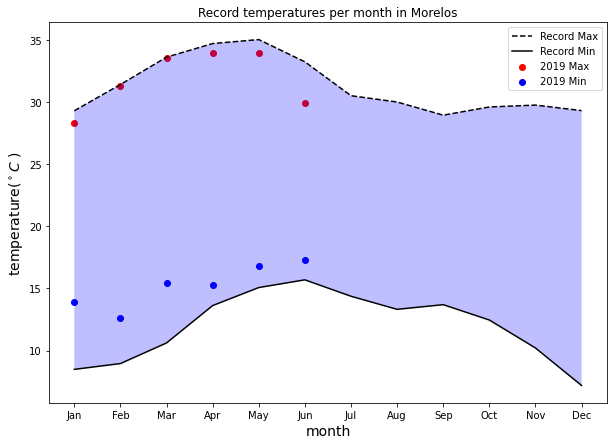

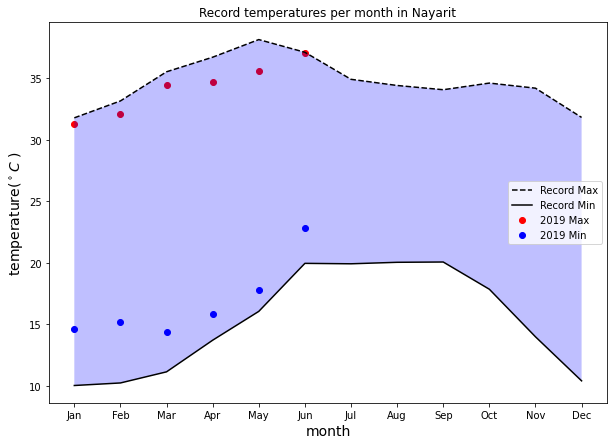

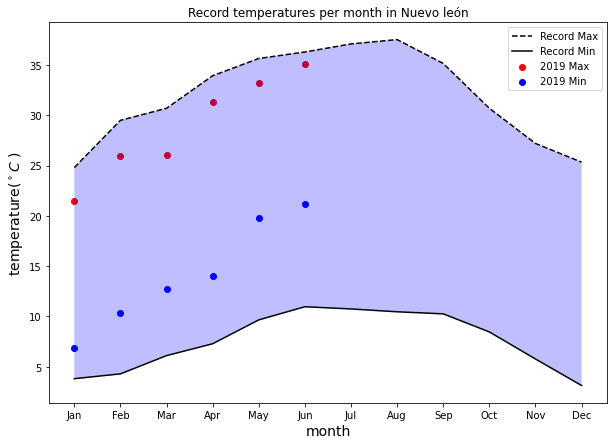

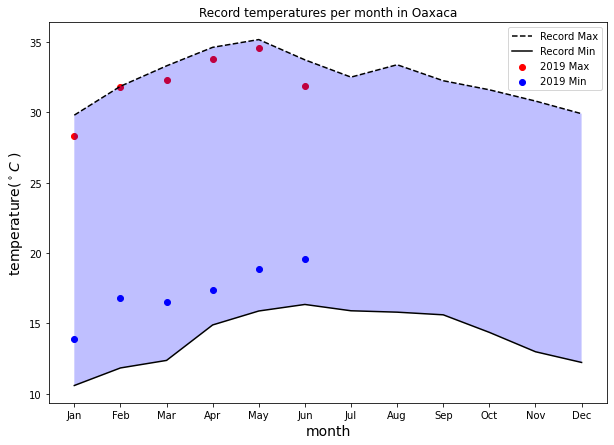

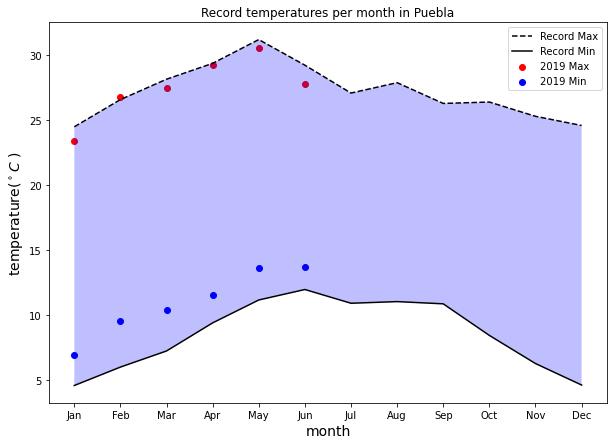

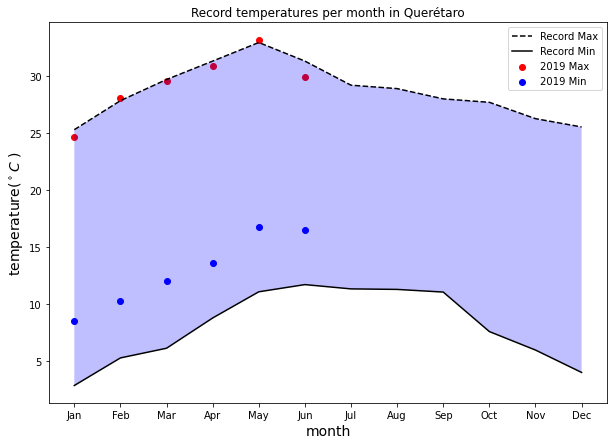

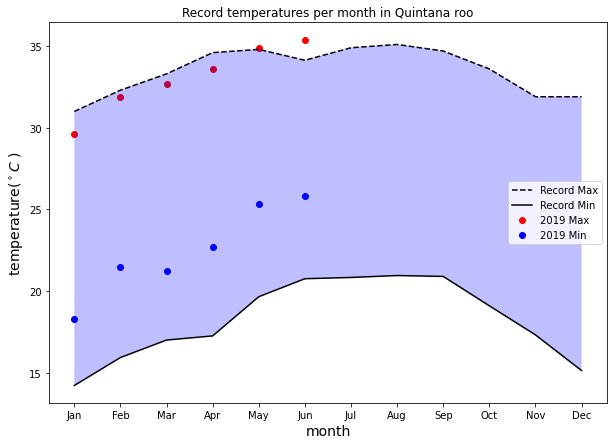

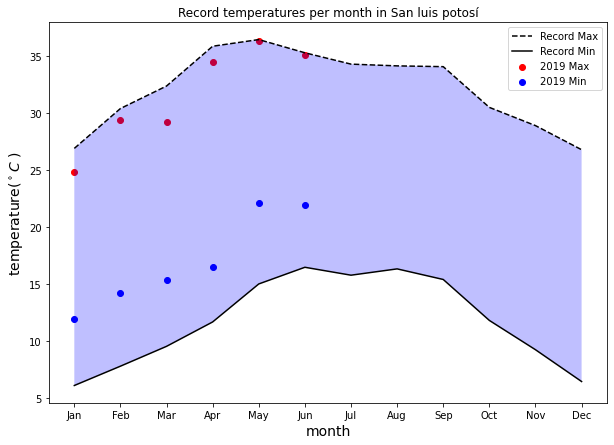

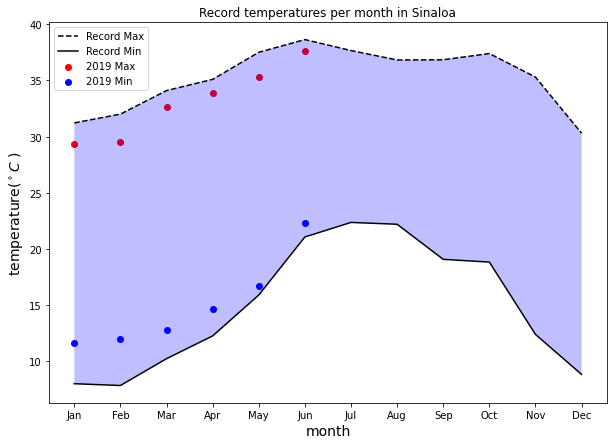

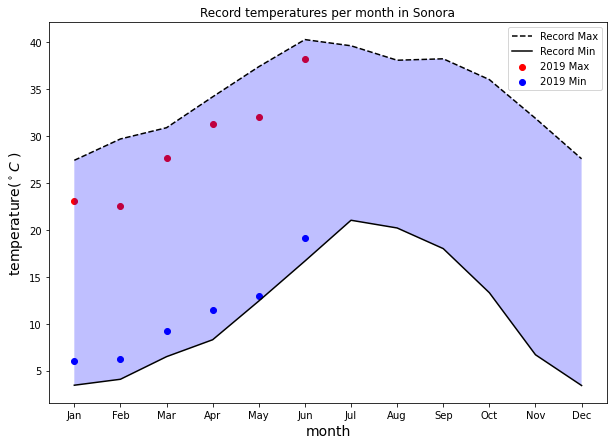

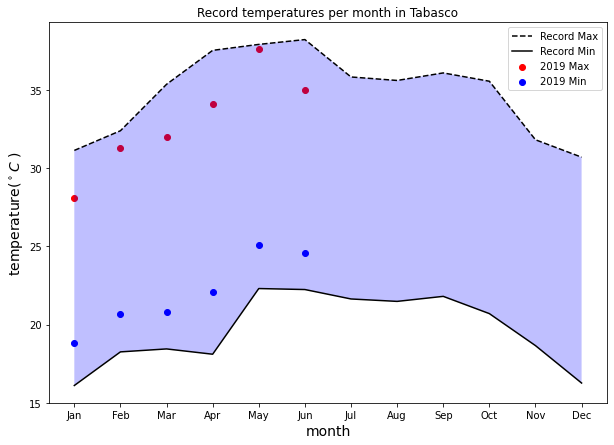

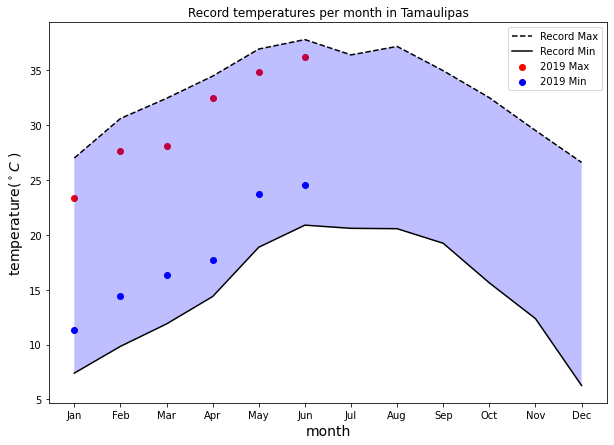

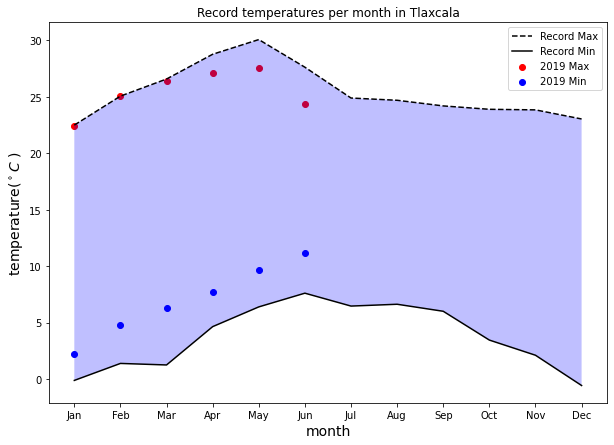

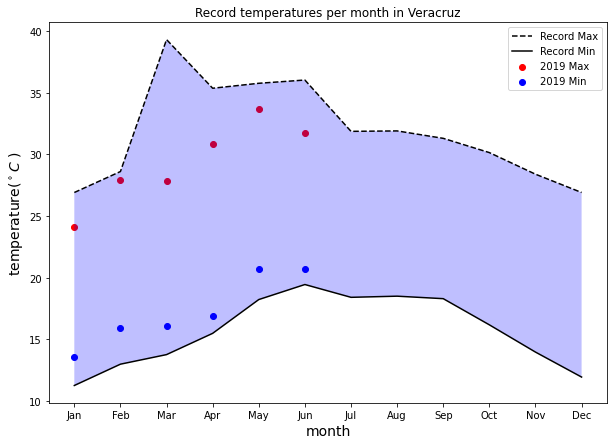

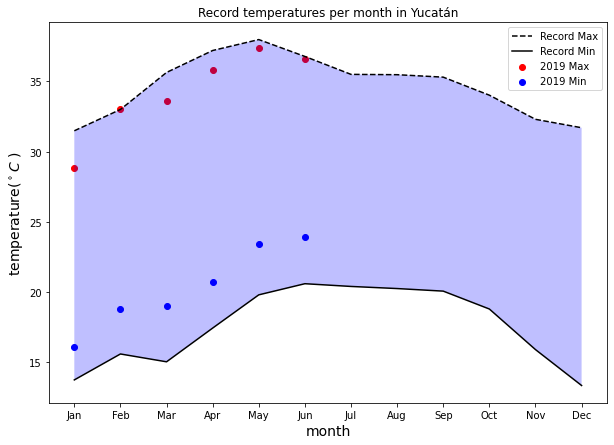

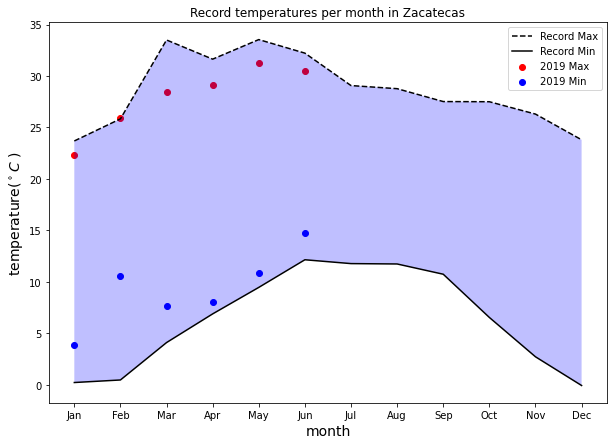

In [7]:
for state in df.State.unique():
    data = df[df.State==state]
    data = data.reset_index(drop=True)
    data = data.sort_values(by=["Year", "Month"])
    #data = data.dropna()

    data_prev = data[data.Year!=2019]
    data_2019 = data[data.Year==2019]

    record_max = data_prev[data_prev.Kind=="max"].groupby(["Month"]).max().Temp
    record_min = data_prev[data_prev.Kind=="min"].groupby(["Month"]).min().Temp

    record_max_2019 = data_2019[data_2019.Kind=="max"].groupby("Month").max().Temp
    record_min_2019 = data_2019[data_2019.Kind=="min"].groupby("Month").min().Temp

    plt.figure(figsize=(10,7))
    plt.plot(np.arange(len(record_max)),record_max, '--k', label='Record Max')
    plt.plot(np.arange(len(record_min)),record_min, '-k', label='Record Min')
    plt.scatter(np.arange(len(record_max_2019)),record_max_2019.values, c='r',label='2019 Max')
    plt.scatter(np.arange(len(record_min_2019)),record_min_2019.values, c='b',label='2019 Min')
    plt.xlabel('month',size=14)
    plt.ylabel('temperature($^\circ C$ )',size=14)
    plt.xticks(np.arange(0,12), ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    ax=plt.gca()
    # ax.axis([0,12,-20,20])
    plt.gca().fill_between(np.arange(0,12), 
                           record_min, record_max, 
                           facecolor='blue', 
                           alpha=0.25)
    plt.legend()
    plt.title("Record temperatures per month in " + state.lower().capitalize())
    plt.show()